# Линейная регрессия

Данные содержатся в файле `data/lin_reg.txt`. Прочитать их можно следующим так:

In [2]:
import numpy as np
D = np.loadtxt('../data/lin_reg.txt', delimiter=',')
X = D[:, :-1]
Y = D[:, -1]

При выполнении заданий **нельзя** пользоваться `scikit-learn` и т.п., только `numpy` и `matplotlib`.

1. Нарисуйте график среднеквадратичной ошибки в зависимости от параметра регуляризации $\alpha$, используя полные данные для обучения и для тестирования. 
2. Подготовьте исходные данные для 5 fold CV.
3. С помощью CV найдите оптимальное значение $\alpha$ на какой-нибудь сетке значений.
4. Постройте валидационную кривую. 
5. Постройте кривую обучения.

In [3]:
import matplotlib.pyplot as plt
plt.hist(Y)
plt.title("Histogram of Y")

Text(0.5,1,'Histogram of Y')

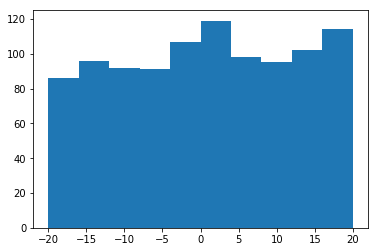

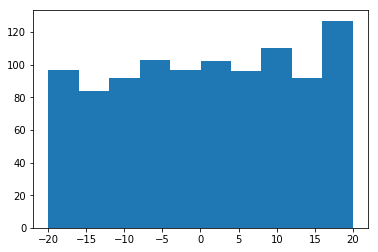

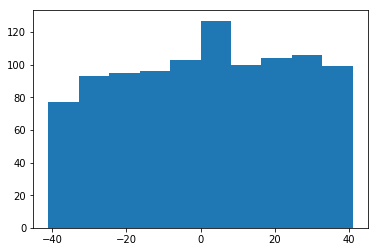

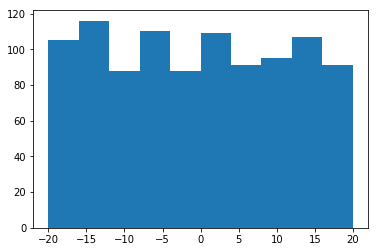

In [4]:
for i, column in enumerate(X.T):
    plt.figure(i)
    plt.hist(column)

In [5]:
def solve(alpha):
    theta = np.linalg.inv(X.T @ X + alpha * np.identity(X.shape[1])) @ X.T @ Y
    return theta

In [6]:
X = np.hstack((np.ones((X.shape[0],1)), X))

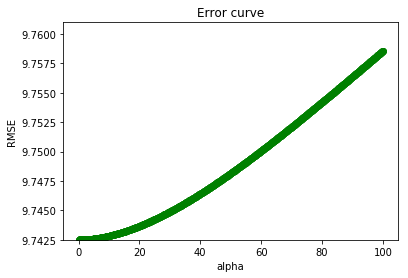

In [7]:
alphas = np.linspace(0, 100, num = 1000)

plt.figure(0)
plt.xlabel("alpha")
plt.ylabel("RMSE")
plt.title("Error curve")
plt.ylim(9.7425, 9.761)

for alpha in alphas:
    theta = solve(alpha)
    
    Y_pred = 0
    for i in range(0, X.shape[1]):
        Y_pred += theta[i]*X[:,i]
    
    rmse = np.sqrt(np.sum(np.square(Y_pred - Y))/Y.shape[0])
    plt.plot(alpha, rmse, 'go')

In [8]:
def cv_alpha(nfolds):
    alphas = np.linspace(0, 10000, num = 1000)
    rmse_min = 999999
    best_alpha = 0
    
    rmse_history = list()
    for alpha in alphas:
        step = int(X.shape[0]/nfolds)
        
        rmse_folds_training = list()
        rmse_folds_validation = list()
        
        for fold in range(0, nfolds):
            test_start = step*fold
            test_end = step*fold + step
            
            X_train1 = X[0:test_start,:]
            X_train2 = X[test_end:,:]
            Y_train1 = Y[0:test_start]
            Y_train2 = Y[test_end:]

            X_train = np.vstack((X_train1, X_train2))
            Y_train = np.concatenate((Y_train1, Y_train2))
            X_test = X[test_start:test_end,:]
            Y_test = Y[test_start:test_end]

            theta = np.linalg.inv(X_train.T @ X_train + alpha * np.identity(X_train.shape[1])) @ X_train.T @ Y_train
            
            Y_validation = 0
            for i in range(0, X_test.shape[1]):
                Y_validation += theta[i]*X_test[:,i]
                
            Y_pred_train = 0
            for i in range(0, X_train.shape[1]):
                Y_pred_train += theta[i]*X_train[:,i]
            
            
            rmse_folds_validation.append(np.sqrt(np.sum(np.square(Y_validation - Y_test))/Y_test.shape[0]))
            rmse_folds_training.append(np.sqrt(np.sum(np.square(Y_pred_train - Y_train))/Y_train.shape[0]))
            
        rmse_validation = np.mean(rmse_folds_validation)
        rmse_training = np.mean(rmse_folds_training)
        rmse_history.append((alpha, rmse_validation, rmse_training))
    return rmse_history

cv = cv_alpha(5)

In [9]:
tradeoff = 99999

for i in cv:
    bias_variance = np.abs(i[2] - i[1])
    if bias_variance < tradeoff:
        tradeoff = bias_variance
        best_alpha = i[0]
        
print(best_alpha)

3163.163163163163


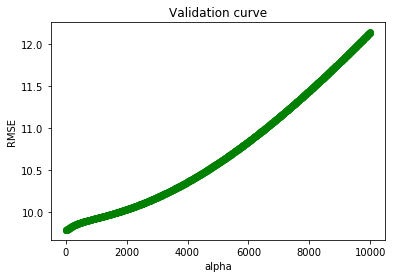

In [10]:
plt.xlabel("alpha")
plt.ylabel("RMSE")
plt.title("Validation curve")
for i in cv:
    plt.plot(i[0], i[1], 'go')

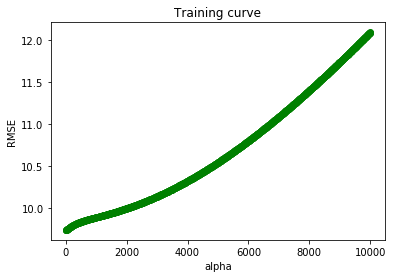

In [11]:
plt.xlabel("alpha")
plt.ylabel("RMSE")
plt.title("Training curve")
for i in cv:
    plt.plot(i[0], i[2], 'go')